In [510]:
#@title **Montando el drive** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA-PROJECT')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/IA-PROJECT


In [511]:
#@title **Cargando libreria** { display-mode: "form" }

from __future__ import division, print_function, unicode_literals
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize
import sklearn.metrics as metrics
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [512]:
#@title **Importando el conjunto de datos de Matematicas**
data_1 = pd.read_csv("csv/student-mat.csv", sep=";" )
X1 = data_1.values[:,:-1]
y1 = data_1.values[:,-1]
print(X1.shape, y1.shape)
data_1.head()


(395, 32) (395,)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [513]:
#@title **Importando el conjunto de datos de Portugues**
data_2 = pd.read_csv("csv/student-por.csv", sep=";" )
X2 = data_2.values[:,:-1]
y2 = data_2.values[:,-1]
print(X2.shape, y2.shape)
data_2.head()

(649, 32) (649,)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [514]:
#@title **Explorando metricas de Matematicas**
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [515]:
#@title **Explorando metricas de Portugues**
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [516]:
#@title **Informacion del tipo de datos de Matematicas**
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [517]:
#@title **Informacion del tipo de datos de Portugues**
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [518]:
#@title Cambiamos las propiedades objeto en caracteristica por categoria
for labels, content in data_1.items():
    if pd.api.types.is_string_dtype(content):
        data_1[labels] = content.astype("category").cat.as_ordered()

In [519]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

In [520]:
#@title **Ahora los valores de nuestras categorias los cambiamos a valores numericos tratables**
for labels, content in data_1.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_1[labels] = pd.Categorical(content).codes

In [521]:
data_1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [522]:
#@title **Cambiamos las propiedades objeto en caracteristica por categoria**
for labels, content in data_2.items():
    if pd.api.types.is_string_dtype(content):
        data_2[labels] = content.astype("category").cat.as_ordered()

In [523]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    int64   
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    int64   
 7   Fedu        649 non-null    int64   
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    int64   
 13  studytime   649 non-null    int64   
 14  failures    649 non-null    int64   
 15  schoolsup   649 non-null    category
 16  famsup      649 non-null    category
 17  paid        649 non-null    category
 18  activities  649 non-null    category
 19  nursery 

In [524]:
#@title **Ahora los valores de nuestras categorias los cambiamos a valores numericos tratables**
for labels, content in data_2.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_2[labels] = pd.Categorical(content).codes

In [525]:
data_2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [526]:
#@title Correlacion del conjunto de datos de Matematicas
data_1.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


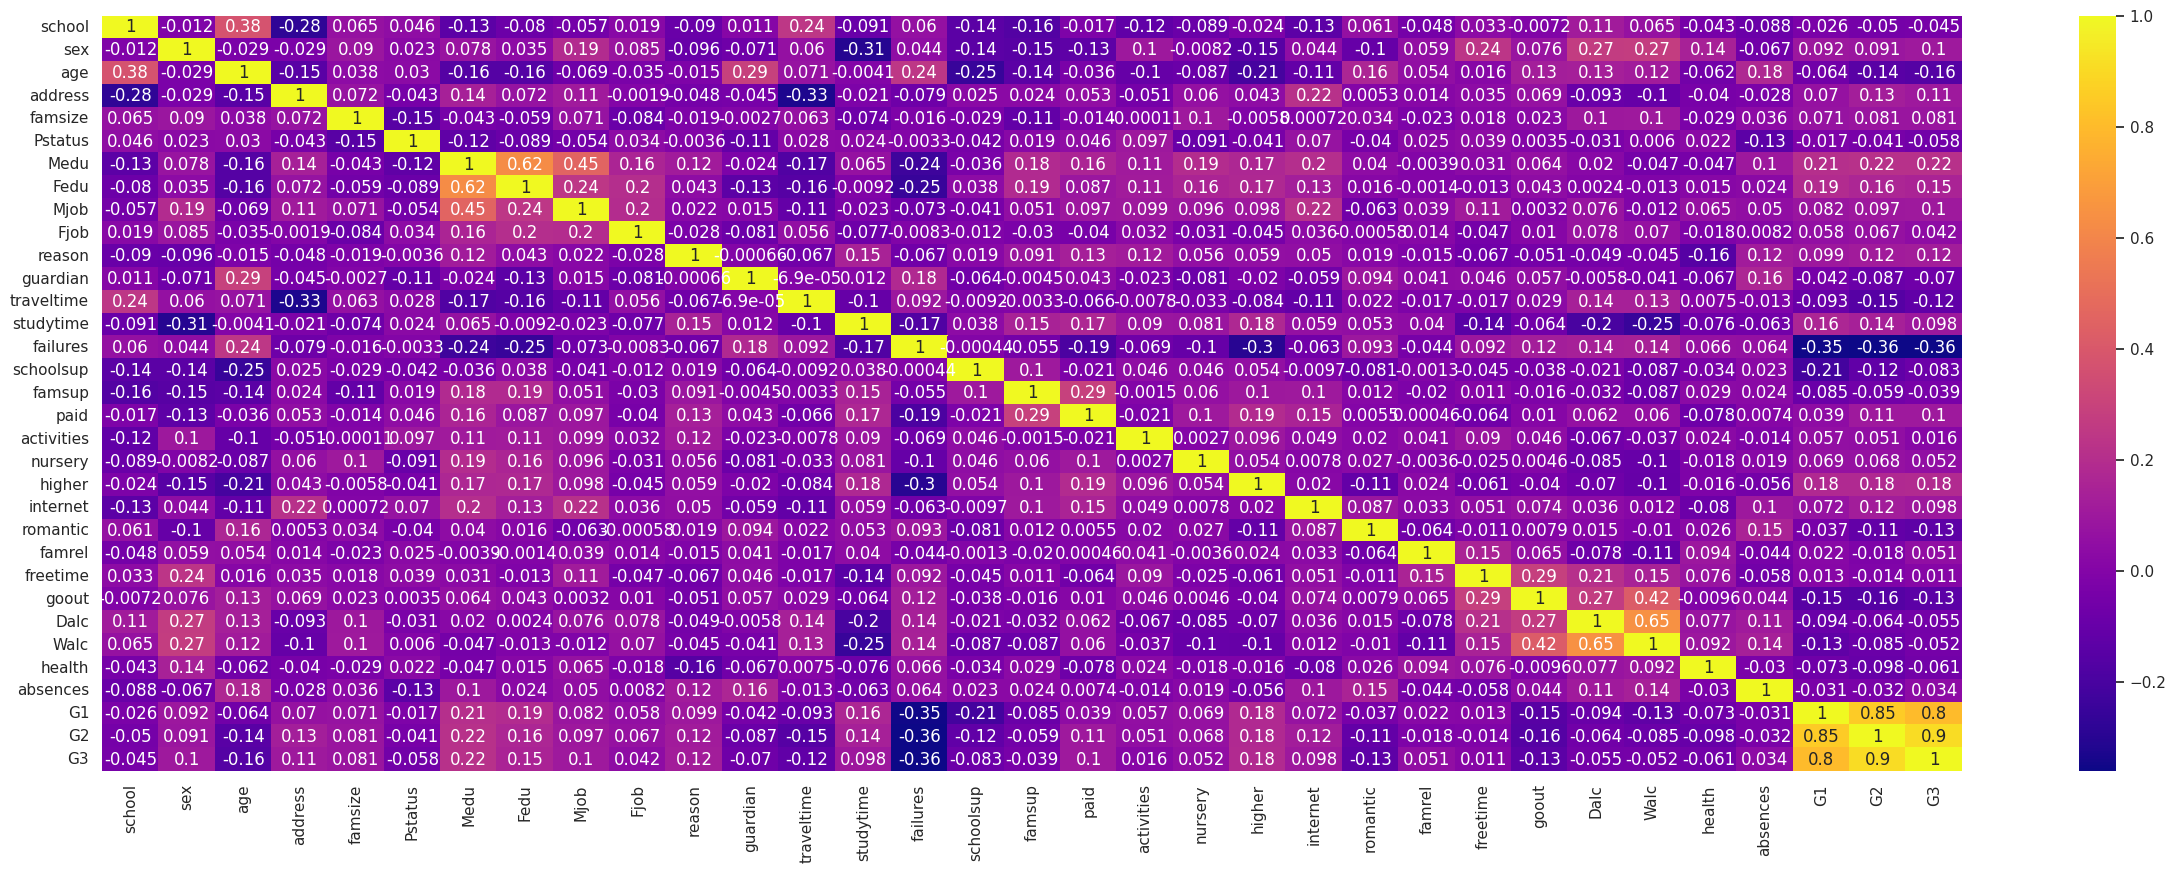

In [527]:
plt.figure(figsize=(30,10), dpi=100)
sns.heatmap(data_1.corr(), cmap='plasma', annot=True)

In [528]:
#@title Correlacion del conjunto de datos de Portugues
data_2.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.083050,0.087170,-0.354520,0.022252,0.028120,-0.254787,-0.209806,-0.206829,-0.081872,...,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
sex,-0.083050,1.000000,-0.043662,0.025503,0.098205,0.064700,0.119127,0.083913,0.149635,0.080466,...,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,0.087170,-0.043662,1.000000,-0.025848,-0.002470,-0.005631,-0.107832,-0.121050,-0.071770,-0.050846,...,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,-0.354520,0.025503,-0.025848,1.000000,0.046113,-0.094635,0.190320,0.141493,0.159761,-0.006535,...,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.157127,0.154600,0.167637
famsize,0.022252,0.098205,-0.002470,0.046113,1.000000,-0.239608,-0.014325,-0.039538,0.019600,-0.059443,...,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,0.028120,0.064700,-0.005631,-0.094635,-0.239608,1.000000,-0.057174,-0.031856,-0.028874,0.054306,...,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,0.015251,0.018689,-0.000754
Medu,-0.254787,0.119127,-0.107832,0.190320,-0.014325,-0.057174,1.000000,0.647477,0.459337,0.152582,...,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,0.083913,-0.121050,0.141493,-0.039538,-0.031856,0.647477,1.000000,0.290703,0.211604,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,-0.206829,0.149635,-0.071770,0.159761,0.019600,-0.028874,0.459337,0.290703,1.000000,0.202651,...,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.181551,0.153875,0.148252
Fjob,-0.081872,0.080466,-0.050846,-0.006535,-0.059443,0.054306,0.152582,0.211604,0.202651,1.000000,...,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.109847,0.086343,0.052953


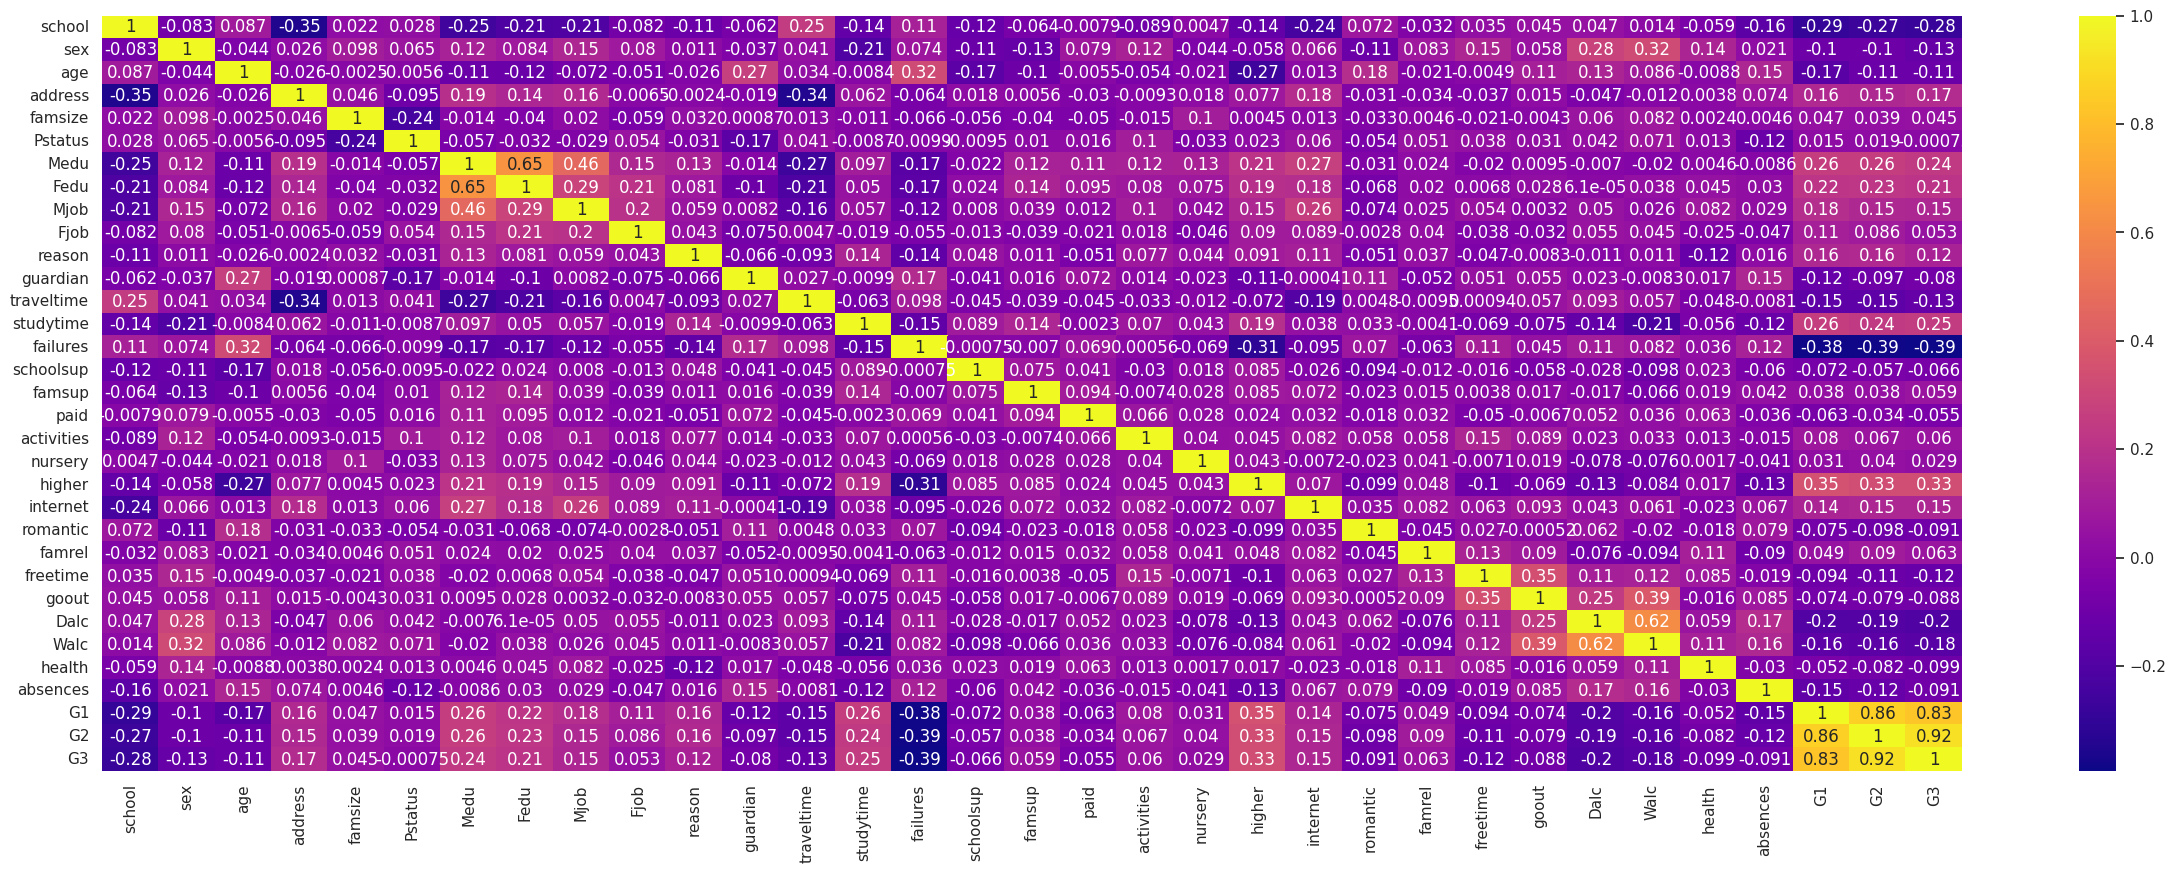

In [529]:
plt.figure(figsize=(30,10), dpi=100)
sns.heatmap(data_2.corr(), cmap='plasma', annot=True)

Como G1 y G2 están altamente correlacionados con G3, nuestra caracteristica objetivo, descartaremos G1 y G2 para el entrenamiento.

In [530]:
#@title **Separamos los datos en X , y**
X1 = data_1.drop(['G1','G2','G3'], axis=1)
y1 = data_1['G3']

In [531]:
#@title **Separamos los datos en X , y**
X2 = data_2.drop(['G1','G2','G3'], axis=1)
y2 = data_2['G3']

In [532]:
X1.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,4


In [533]:
y1

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [534]:
X2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,4
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,2
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,6
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,0
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,0


In [535]:
y2

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [536]:
#@title **Renombramos para diferenciar facilmente las columnas de notas en los cursos**
data_1.rename(columns={"G1": "G1_mat", "G2": "G2_mat","G3":"G3_mat"},inplace=True)
data_1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [537]:
#@title **Renombramos para diferenciar facilmente las columnas de notas en los cursos**
data_2.rename(columns={"G1": "G1_por", "G2": "G2_por","G3":"G3_por"},inplace=True)
data_2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1_por,G2_por,G3_por
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [538]:
#@title **Agregamos una columna nueva a nuestro dataset que contiene el promedio para mas adelante explorarla**
data_1['Aveare_grades'] = data_1[['G1_mat','G2_mat','G3_mat']].mean(axis=1)
data_2['Aveare_grades'] = data_2[['G1_por','G2_por','G3_por']].mean(axis=1)

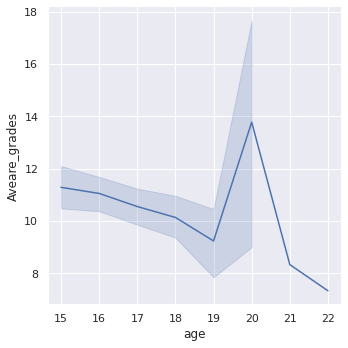

In [539]:
#@title **Encontramos una relacion entre la edad y el promedio de las notas donde los estudiantes de entre 19 y 20 anios tienen un rendimiento mejor con respecto a los demas en el conjuntos de datos de la materia Matematicas**
sns.relplot(data = data_1, y='Aveare_grades', x='age', kind="line")

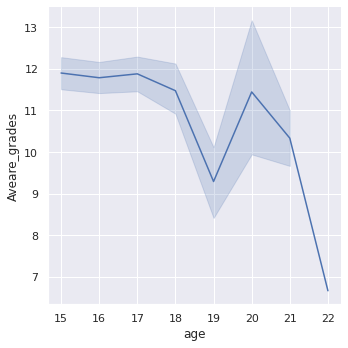

In [540]:
#@title **Encontramos una relacion entre la edad y el promedio de las notas donde los estudiantes de 19 anios tienen califaciones atipicamente mas bajas que los demas en el conjunto de datos de la materia Portugues**
sns.relplot(data = data_2, y='Aveare_grades', x='age', kind="line")

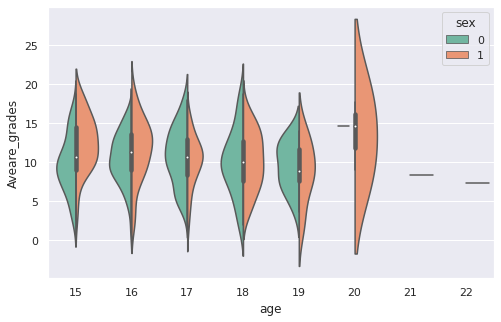

In [541]:
plt.figure(figsize=(8,5))
sns.violinplot(x="age", y="Aveare_grades", hue="sex",
                    data=data_1, palette="Set2", split=True,
                    scale="count")

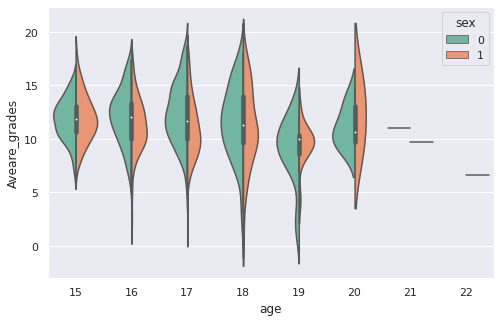

In [542]:
plt.figure(figsize=(8,5))
sns.violinplot(x="age", y="Aveare_grades", hue="sex",
                    data=data_2, palette="Set2", split=True,
                    scale="count")

In [543]:
#@title **Normalizamos nuestro ground truth y la columna edad**
data_1[['age','G3_mat']] = normalize(data_1[['age','G3_mat']])
data_2[['age','G3_por']] = normalize(data_2[['age','G3_por']])

In [544]:
data_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1_mat,G2_mat,G3_mat,Aveare_grades
0,0,0,0.948683,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,0.316228,5.666667
1,0,0,0.942990,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,0.332820,5.333333
2,0,0,0.832050,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,0.554700,8.333333
3,0,0,0.707107,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,0.707107,14.666667
4,0,0,0.847998,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,0.529999,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,0.911922,1,1,0,2,2,3,3,...,5,4,4,5,4,11,9,9,0.410365,9.000000
391,1,1,0.728200,1,1,1,3,1,3,3,...,4,5,3,4,2,3,14,16,0.685365,15.333333
392,1,1,0.948683,0,0,1,1,1,2,2,...,5,3,3,3,3,3,10,8,0.316228,8.333333
393,1,1,0.874157,0,1,1,3,2,3,2,...,4,1,3,4,5,0,11,12,0.485643,11.000000


In [545]:
data_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1_por,G2_por,G3_por,Aveare_grades
0,0,0,0.853282,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,0.521450,7.333333
1,0,0,0.839570,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,0.543251,10.333333
2,0,0,0.780869,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,0.624695,12.333333
3,0,0,0.731055,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,0.682318,14.000000
4,0,0,0.776114,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,0.630593,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,0.884918,0,0,1,2,3,3,2,...,4,2,1,2,5,4,10,11,0.465746,10.333333
645,1,0,0.747409,1,1,1,3,1,4,3,...,3,4,1,1,1,4,15,15,0.664364,15.333333
646,1,0,0.894427,1,0,1,1,1,2,2,...,1,1,1,1,5,6,11,12,0.447214,10.666667
647,1,1,0.861934,1,1,1,3,1,3,3,...,4,5,3,4,2,6,10,10,0.507020,10.000000


In [546]:
#@title **Eliminanos del conjuntos de datos de estudio las columnas G1 y G2 que estan altamente relacionadas con nuestro groun truth**
X1 = data_1.drop(data_1[['G1_mat','G2_mat','G3_mat']],axis = 1)
y1 = data_1['G3_mat']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=21)

In [547]:
#@title **Eliminanos del conjuntos de datos de estudio las columnas G1 y G2 que estan altamente relacionadas con nuestro groun truth**
X2 = data_2.drop(data_2[['G1_por','G2_por','G3_por']],axis = 1)
y2 = data_2['G3_por']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=21)

In [548]:
#@title **Funcion que nos retorna metricas para estudiar el rendimiento de cada estimador de regresion**
def regression_results(y_true, y_pred):
    #Metricas de la regresion
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [549]:
#@title ***Random Forest Regressor***
est1 = RandomForestRegressor()
est1.fit(X1_train,y1_train)
regression_results(y1_test,est1.predict(X1_test))

explained_variance:  0.9993
MAE:  0.0016
MSE:  0.0
RMSE:  0.0053


In [550]:
#@title ***Random Forest Regressor***
est2 = RandomForestRegressor()
est2.fit(X2_train,y2_train)
regression_results(y2_test,est2.predict(X2_test))

explained_variance:  0.9904
MAE:  0.0022
MSE:  0.0001
RMSE:  0.012


In [551]:
#@title ***Decision Tree Regressor***
est1DTR = DecisionTreeRegressor()
est1DTR.fit(X1_train, y1_train)
regression_results(y1_test, est1DTR.predict(X1_test))

explained_variance:  0.9993
MAE:  0.001
MSE:  0.0
RMSE:  0.0053


In [552]:
#@title ***Decision Tree Regressor***
est2DTR = DecisionTreeRegressor()
est2DTR.fit(X2_train, y2_train)
regression_results(y2_test, est2DTR.predict(X2_test))

explained_variance:  0.9815
MAE:  0.0019
MSE:  0.0003
RMSE:  0.0167


In [553]:
#@title ***SVR con kernels diferentes***
kernels = ['linear', 'poly','rbf']
for k in kernels:
  est1SVR = SVR(kernel=k)
  est1SVR.fit(X1_train, y1_train)
  print(k)
  regression_results(y1_test,est1SVR.predict(X1_test))

linear
explained_variance:  0.8468
MAE:  0.0652
MSE:  0.0064
RMSE:  0.0798
poly
explained_variance:  0.785
MAE:  0.0719
MSE:  0.0085
RMSE:  0.0922
rbf
explained_variance:  0.8953
MAE:  0.0501
MSE:  0.0042
RMSE:  0.065


In [554]:
#@title ***SVR con kernels diferentes***
kernels = ['linear', 'poly','rbf']
for k in kernels:
  est2SVR = SVR(kernel=k)
  est2SVR.fit(X2_train, y2_train)
  print(k)
  regression_results(y2_test,est1SVR.predict(X2_test))

linear
explained_variance:  0.7665
MAE:  0.0454
MSE:  0.0035
RMSE:  0.0593
poly
explained_variance:  0.7665
MAE:  0.0454
MSE:  0.0035
RMSE:  0.0593
rbf
explained_variance:  0.7665
MAE:  0.0454
MSE:  0.0035
RMSE:  0.0593


In [555]:
#@title ***Deep Learning***
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X1_train, y1_train, epochs=5)
test_loss, test_acc = model.evaluate(X1_test, y1_test)

print('Test accuracy:', test_acc)

Epoch 1/5
9/9 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.0797
Epoch 2/5
9/9 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.0942
Epoch 3/5
9/9 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.0942
Epoch 4/5
9/9 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.0942
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.1008
Test accuracy: 0.10084033757448196


In [556]:
#@title **Interaccion** - Ahora para interacion indicaras un indice cualquiera el cual sera consultado en nuestro Dataset y comparado con la prediccion de nuestra regresion
index =    1#@param {type:"integer"}
dataset =  1#@param {type: "integer"}
#@markdown ### 1: RandomForestRegressor 2: DecisionTreeRegressor 3: SupportVectorRegressor
estimator =  1#@param {type: "integer"}
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
svr = SVR()
i = estimator - 1
estimators = [RFR, DTR, svr]

def prediction(est, index, x_test, y_test):
  y_pred = est.predict(x_test)
  arr = y_test.to_numpy()
  print("Prediccion en el indice "+ str(index) + ": "+ str(y_pred[index])+" - "+"ground truth en el indice: "+str(arr[index]))

if (i > len(estimators) or i <= -1):
  print("No se ingreso un estimador correcto")
else:
  est = estimators[i]
  if dataset == 1:
    est.fit(X1_train, y1_train)
    prediction(est, index, X1_test, y1_test)
  elif dataset == 2:
    est.fit(X2_train, y2_train)
    prediction(est, index, X2_test, y2_test)
  else:
    print("Error! #$%&$%*$%@%#@*(")


Prediccion en el indice 1: 0.7280748827634851 - ground truth en el indice: 0.7270131525498175
